# Diabetes Prediction Analysis
### Lauren Ables-Torres, Paulette Petracco, Holt Jones

In [1]:
# Import modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st
from scipy.stats import ttest_ind 

# Read in csv
data = pd.read_csv("../resources/diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [2]:
# Check for duplicates
print(data[data.duplicated()])

       gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6                  159        

In [3]:
# Drop duplicates
data.drop_duplicates(inplace=True)
len(data[data.duplicated() == True])

0

In [4]:
# Create summary statistics table
summary_table = data.describe()
summary_table

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
#Assign variables
mean_age = data["age"].mean() 
mean_age 

#Number of males calculated  
males = len(data[(data["gender"] == "Male")]) 

#number females 
len(data[(data["gender"] == "Female")]) 

#Number of patitents with BMI over 32 calculated  
obese =  len(data[data['bmi'] > 32]) 

#Number of patients with BMI over 32 and with diabetes calculated  
obese_with_betes =len(data[(data['bmi'] > 32) & (data['diabetes'] == 1)]) 
obese_with_betes 

# Rate of Patients with diabetes and BMI over 32 calculated  
rate_obese_with_betes = (obese_with_betes/obese)*100 
rate_obese_with_betes 

#Number of patients with healthy BMI between 18 and 25 calculated  
healthy_BMI = len(data[(data['bmi'] <= 25) & (data["bmi"] >= 18)]) 
healthy_BMI  

#Number of patients with healthy BMI and having diabetes calculated 
healthy_BMI_betes = len(data[(data['bmi'] <= 25) & (data["bmi"] >= 18) & (data['diabetes'] == 1)]) 
healthy_BMI_betes 

#rate of patients having healthy BMI calculated  
rate_healthy_BMI_betes = (healthy_BMI_betes/healthy_BMI)*100 
rate_healthy_BMI_betes 


3.74978621515307

In [6]:
# Get the subset of data for patients with BMI over 32 
over_32_bmi = data[data['bmi'] > 32] 

# Get the subset of data for patients with BMI between 18 and 25 
between_18_25_bmi = data[(data['bmi'] >= 18) & (data['bmi'] <= 25)] 

# Perform two-sample t-test 
t_statistic, p_value = ttest_ind(over_32_bmi['blood_glucose_level'], between_18_25_bmi['blood_glucose_level'], equal_var=False) 

# Print the results 
print("T-statistic:", t_statistic) 
print("P-value:", p_value) 

#expected output  
#T-statistic: 24.13836522389783 P-value: 1.3931748600787679e-127 

T-statistic: 24.13836522389783
P-value: 1.3931748600787679e-127


##### Analysis: The t test above is used to test our null hypothesis. Our null hypothesis states that BMI has no affect on Diabetes. Our alternative suggests that those patients with a BMI over 32 will be disproportionately affected by diabetes compared to those with a BMI between 18 and 25 (considered healthy range). Our two-sample t-test using blood glucose levels as a proxy for diabetes, as we could not directly use diabetes status for it is not a continuous variable, shows that we must reject our Null and accept the alternative! Those with BMI's greater than 32 are disproportionately impacted by diabetes compared to those with a BMI between 18 and 25! 


In [7]:
#This is code for a binning of the adults in our study, adults were grouped by ages 20-35 (young adult), 35-50 (adult), 50-65 (middle aged) and 65 + (Elderly)  
age_diabetes_df = data[['age', 'diabetes']] 
age_bins = [20, 35, 50, 65, 80] 
age_labels = ["Young Adult", "Adult", "Middle Aged", "Elderly"] 

# Categorize the 'age' column into the defined bins 
data.loc[:,'age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False) 

# Group by age group and sum the 'diabetes' column to get the count of patients with diabetes 
diabetes_count_by_age_group = data.groupby('age_group')['diabetes'].sum().reset_index() 

# Calculate the total number of patients in each age group 
total_patients_by_age_group = data['age_group'].value_counts().reset_index() 
total_patients_by_age_group.columns = ['age_group', 'total_patients'] 

# Merge the two DataFrames on 'age_group' 
age_diabetes_df = pd.merge(diabetes_count_by_age_group, total_patients_by_age_group, on='age_group') 

# Calculate the percentage of patients with diabetes within each age range 
age_diabetes_df['percentage_diabetes'] = (age_diabetes_df['diabetes'] / age_diabetes_df['total_patients']) * 100 

age_diabetes_df['percentage_diabetes'] = age_diabetes_df['percentage_diabetes'].map("{:.2f}%".format) 

# Display the result 
(age_diabetes_df) 

C:\Users\djt1414\AppData\Local\Temp\ipykernel_22012\4256636900.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_count_by_age_group = data.groupby('age_group')['diabetes'].sum().reset_index()


,age_group,diabetes,total_patients,percentage_diabetes
0,Young Adult,333,18215,1.83%
1,Adult,1268,20509,6.18%
2,Middle Aged,2990,20734,14.42%
3,Elderly,2771,12724,21.78%


##### Analysis: We can see that as we go up in age citizens become increasingly impacted by diabetes.  

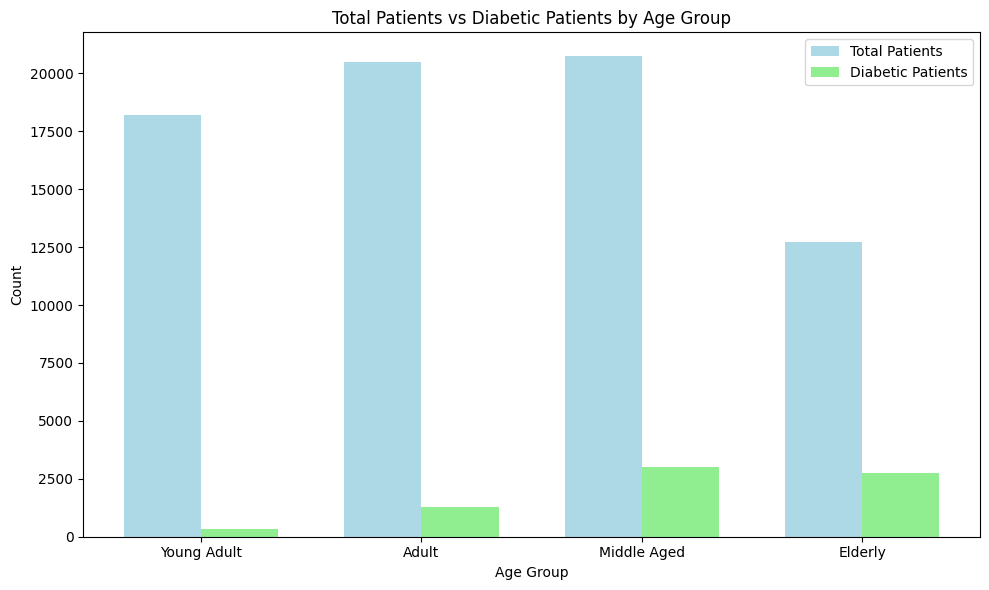

In [8]:
#This bar plot shows number of diabetic patients in each age group vs number of patients in the number group itself  

# Define the width of each bar 
bar_width = 0.35 

# Calculate the position for each group 
index = np.arange(len(age_diabetes_df)) 

# Create the figure and axes objects 
fig, ax = plt.subplots(figsize=(10, 6)) 

# Plot the bars for the total number of patients 
bar1 = ax.bar(index, age_diabetes_df['total_patients'], bar_width, label='Total Patients', color='lightblue') 

# Plot the bars for the percentage of diabetic patients 
bar2 = ax.bar(index + bar_width, age_diabetes_df['diabetes'], bar_width, label='Diabetic Patients', color='lightgreen') 

# Add labels, title, and legend 
ax.set_xlabel('Age Group') 
ax.set_ylabel('Count') 
ax.set_title('Total Patients vs Diabetic Patients by Age Group') 
ax.set_xticks(index + bar_width / 2) 
ax.set_xticklabels(age_diabetes_df['age_group']) 
ax.legend() 

# Display the plot 
plt.tight_layout() 
plt.savefig("../output/age_group_db_bar.jpg")
plt.show() 

##### Analysis: We can see that great proportions are represented as diabetic as the age group increases 

In [9]:
# Define lower bound and upper bound based on real-world data (normal limits of BMI)
lower_bound = 18.5
upper_bound = 40

# Identify outliers
outliers = data[(data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)]

# Display outliers
print("Outliers based on BMI")
print(outliers)
print(lower_bound)
print(upper_bound)

Outliers based on BMI
       gender   age  hypertension  heart_disease smoking_history    bmi  \
11     Female  54.0             0              0          former  54.70   
24     Female   4.0             0              0         No Info  13.99   
35       Male   5.0             0              0         No Info  15.10   
39     Female  34.0             0              0           never  56.43   
47     Female  60.0             0              0           never  18.03   
...       ...   ...           ...            ...             ...    ...   
99953  Female  59.0             1              0            ever  60.52   
99960  Female  47.0             0              0          former  45.15   
99987  Female  23.0             0              0           never  17.87   
99993  Female  40.0             0              0           never  40.69   
99996  Female   2.0             0              0         No Info  17.37   

       HbA1c_level  blood_glucose_level  diabetes    age_group  
11          

In [10]:
# Compare Age and BMI to both Blood Glucose Levels and HbA1c Levels 
np.random.seed(0) 
Age_BMI_BGL_HL_df = pd.DataFrame({ 
'age': np.random.randint(0, 100, size=100), 
'bmi': np.random.uniform(10, 96, size=100), 
'blood_glucose_level': np.random.randint(80,300, size=100), 
'HbA1c_level': np.random.uniform(3.5, 9.0, size=100) 

}) 

In [11]:
# Define age bins 
age_bins = [0, 20, 40, 60, 80, 100] 

# Bin ages 
age_data_binned = pd.cut(Age_BMI_BGL_HL_df['age'], bins=age_bins) 

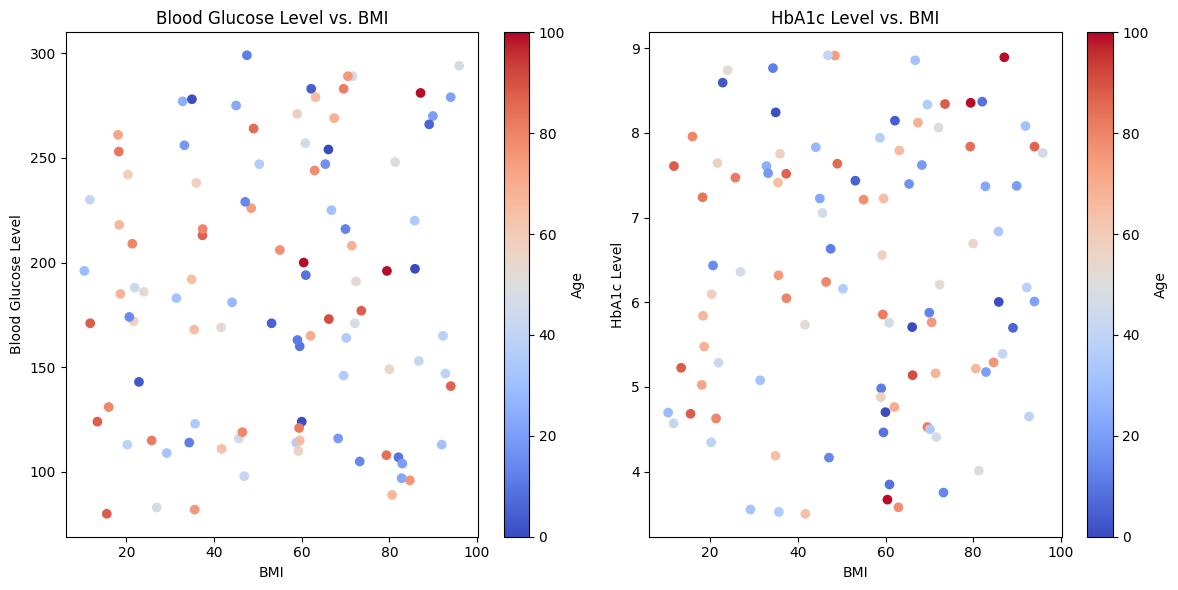

In [12]:
# Define color levels for blood glucose and HbA1c levels 
blood_glucose_colors = [min,max] # Custom color levels for blood glucose levels 
hba1c_colors = [min,max] # Custom color levels for HbA1c levels 

# Plot BMI against blood glucose level 
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1) 
plt.scatter(Age_BMI_BGL_HL_df['bmi'], Age_BMI_BGL_HL_df['blood_glucose_level'], c=Age_BMI_BGL_HL_df['age'], cmap='coolwarm', label='Age', vmin=0, vmax=100) 
plt.xlabel('BMI') 
plt.ylabel('Blood Glucose Level') 
plt.title('Blood Glucose Level vs. BMI') 
plt.colorbar(label='Age') 

# Plot BMI against HbA1c level 
plt.subplot(1, 2, 2) 
plt.scatter(Age_BMI_BGL_HL_df['bmi'], Age_BMI_BGL_HL_df['HbA1c_level'], c=Age_BMI_BGL_HL_df['age'], cmap='coolwarm', label='Age', vmin=0, vmax=100) 
plt.xlabel('BMI') 
plt.ylabel('HbA1c Level') 
plt.title('HbA1c Level vs. BMI') 
plt.colorbar(label='Age') 

plt.tight_layout() 
plt.savefig("../output/bmi_glu_hba1c_scat.jpg") 
plt.show() 

##### These scatter plots aim to visualize the relationships between BMI and blood glucose level, as well as BMI and HbA1c levels, while considering the age of the individuals. By examining the distribution points and the color patterns we can observe any potential trends or associations between these variables. The color bar to the right of each of the plots facilitates the interpretation of how age influences the relationships, allowing for the assessment of age-related patterns in the data.  

##### Overall, these scatter plots provide useful insights into the relationships between BMI, blood glucose levels, HbA1c Levels and age, which helps us to understand potential associations and patterns within the dataset 

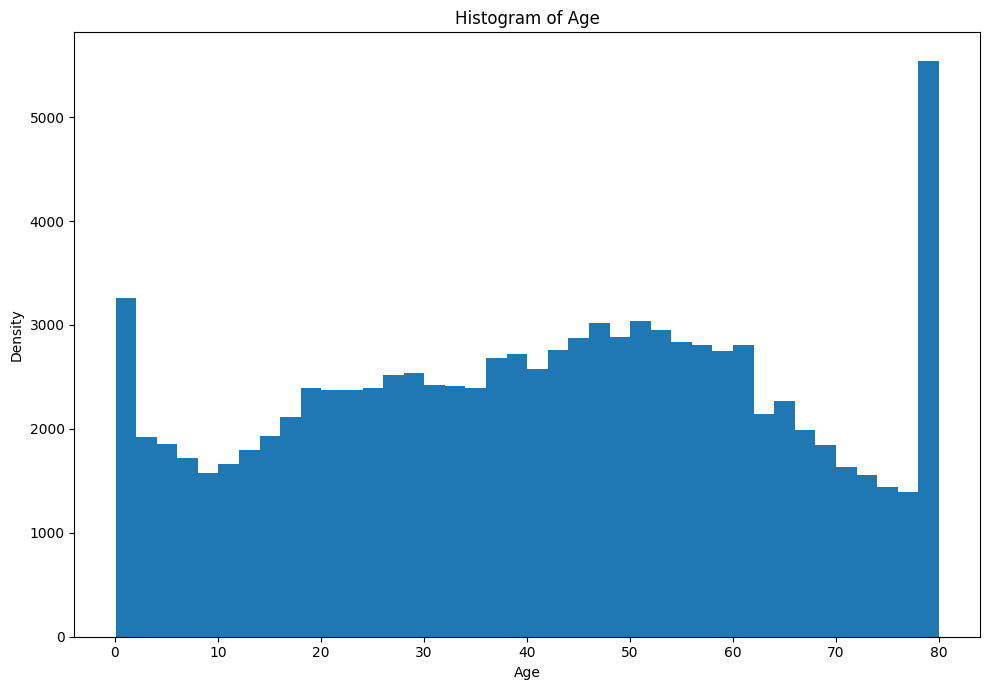

In [13]:
# Histogram showing density for the "age" variable 
plt.figure(figsize=(10, 7)) 
plt.hist(data['age'], bins=40) 
plt.xlabel('Age') 
plt.ylabel('Density') 
plt.title('Histogram of Age') 
plt.tight_layout() 
plt.savefig("../output/age_density_hist.jpg") 
plt.show() 

##### This histogram provides an overview of the distribution of ages within the dataset, which helps to identify the frequency or density of the individuals across the different age groups. There are multiple peaks in this distribution with the age of 80 being largest population, or outlier. Our average age in the population is approximately 42(41.9 to be exact). 

Correlation Coefficient between age and diabetes: 0.26492692423606923


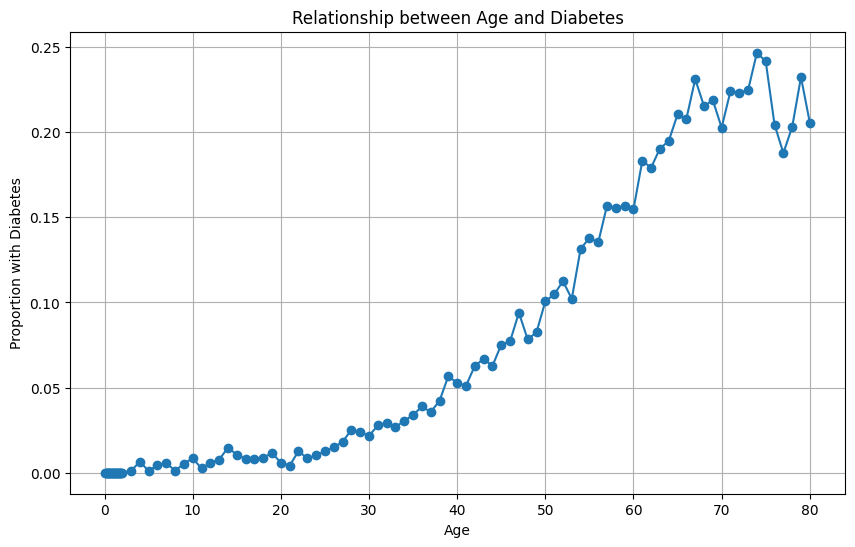

In [14]:
# Group age and diabetes
age_diabetes_proportion = data.groupby('age')['diabetes'].mean()

# Find correlation coefficient for age vs diabetes
correlation_coefficient_age_d = data['age'].corr(data['diabetes'])
print("Correlation Coefficient between age and diabetes:", correlation_coefficient_age_d)

# Plot the relationship between age and proportion of individuals with diabetes
plt.figure(figsize=(10, 6))
plt.plot(age_diabetes_proportion.index, age_diabetes_proportion.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Proportion with Diabetes')
plt.title('Relationship between Age and Diabetes')
plt.grid(True)
plt.savefig("../output/age_vs_diabetes_line.jpg")
plt.show()

##### This line chart shows the relationship between age and diabetes. While the correlation coefficient is only .265 (calculated after attempting several statistical analyses), there is a clear visible trend showing a positive correlation between age and diabetes diagnosis. This makes sense as older individuals are at a higher risk of developing diabetes. The low correlation coefficient may be explained by the small scale for the x-axis (proportion with diabetes) being from 0-.25.

Correlation Coefficient between rounded_bmi and diabetes: 0.2154369366874406


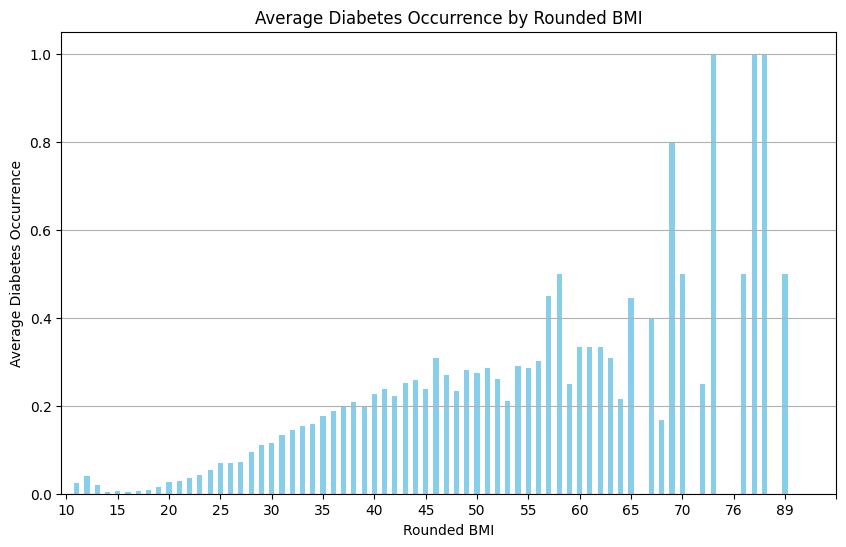

In [15]:
# Group the data by rounded BMI and calculate the average diabetes occurrence for each rounded BMI value 
data['rounded_bmi'] = np.round(data['bmi']).astype(int) 
avg_diabetes_by_bmi = data.groupby('rounded_bmi')['diabetes'].mean() 

# Find correlation coefficient for bmi vs diabetes
correlation_coefficient_bmi_d = data['rounded_bmi'].corr(data['diabetes']) 
print("Correlation Coefficient between rounded_bmi and diabetes:", correlation_coefficient_bmi_d) 

# Create a bar plot 
plt.figure(figsize=(10, 6)) 
avg_diabetes_by_bmi.plot(kind='bar', color='skyblue') 

# Set labels and title 
plt.xlabel('Rounded BMI') 
plt.ylabel('Average Diabetes Occurrence') 
plt.title('Average Diabetes Occurrence by Rounded BMI') 

# Show plot 
plt.grid(axis='y') 
plt.xticks(np.arange(0, 80, 5), rotation=0) 
plt.xticks(rotation=0) 
plt.savefig("../output/diabetes_vs_bmi_bar.jpg") 
plt.show() 

##### This line chart shows the relationship between BMI (rounded) and diabetes. While the correlation coefficient is only .215 (calculated after attempting several statistical analyses), there is a clear visible trend showing a positive correlation between BMI and diabetes. This makes sense as diabetes reflects higher blood sugar, and individuals with higher BMIS have higher fat content which negatively affects blood sugar levels due to the interaction of lipids and the immune response. The low correlation coefficient may be explained by the small scale of the x-axis (0 to 1).

Correlation Coefficient between rounded_bmi and hypertension: 0.14872550077957103


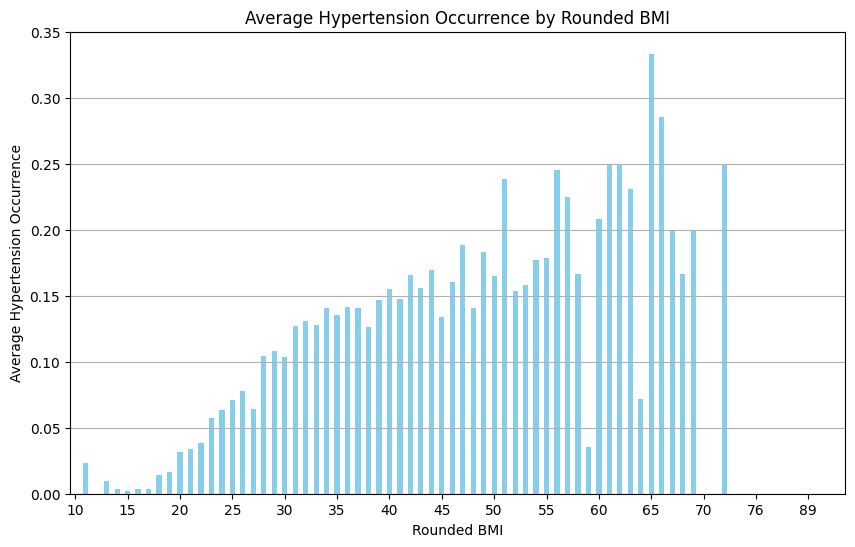

In [16]:
# Group the data by rounded BMI and calculate the average diabetes occurrence for each rounded BMI value
data['rounded_bmi'] = np.round(data['bmi']).astype(int)
avg_hypertension_by_bmi = data.groupby('rounded_bmi')['hypertension'].mean()

# Find correlation coefficient for rounded BMI vs hypertension
correlation_coefficient_bmi_ht = data['rounded_bmi'].corr(data['hypertension']) 
print("Correlation Coefficient between rounded_bmi and hypertension:", correlation_coefficient_bmi_ht) 

# Create a bar plot
plt.figure(figsize=(10, 6))
avg_hypertension_by_bmi.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Rounded BMI')
plt.ylabel('Average Hypertension Occurrence')
plt.title('Average Hypertension Occurrence by Rounded BMI')

# Show plot
plt.grid(axis='y')
plt.xticks(np.arange(0, 75, 5), rotation=0)
plt.xticks(rotation=0)
plt.savefig("../output/hypertension_vs_bmi_bar.jpg")
plt.show()


##### This line chart shows the relationship between BMI and hypertension. While the correlation coefficient is only .149 (calculated after attempting several statistical analyses), there is a clear visible trend showing a positive correlation between BMI and hypertension. This makes sense as individuals with a higher BMI often have higher blood pressure due to weakening/clogging of blood vessels. The low correlation coefficient may be explained by the very small scale for the x-axis (average hypertension occurrence) being from 0-.35.

Correlation Coefficient between rounded_bmi and heart disease: 0.06159409798700216


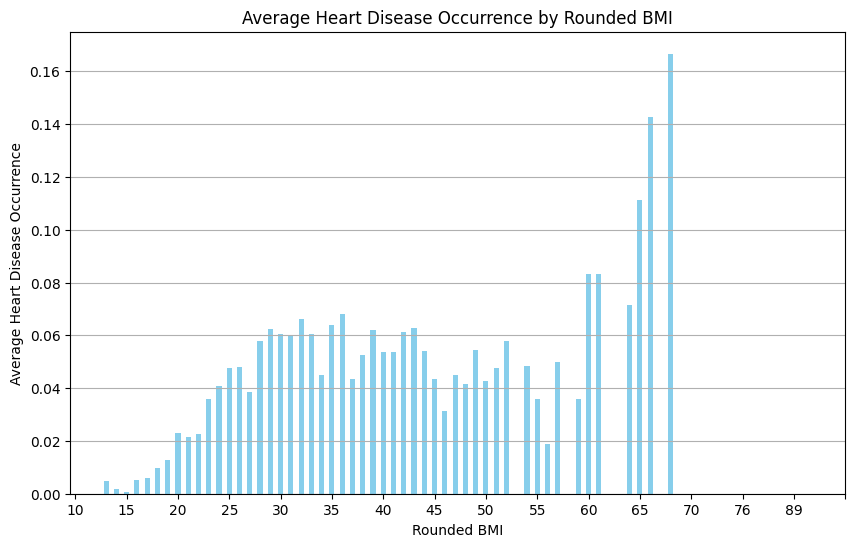

In [17]:
# Group the data by rounded BMI and calculate the average heart disease occurrence for each rounded BMI value
data['rounded_bmi'] = np.round(data['bmi']).astype(int)
avg_heartdisease_by_bmi = data.groupby('rounded_bmi')['heart_disease'].mean()

# Find correlation coefficient for rounded BMI vs heart disease
correlation_coefficient_bmi_hd = data['rounded_bmi'].corr(data['heart_disease']) 
print("Correlation Coefficient between rounded_bmi and heart disease:", correlation_coefficient_bmi_hd) 

# Create a bar plot
plt.figure(figsize=(10, 6))
avg_heartdisease_by_bmi.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Rounded BMI')
plt.ylabel('Average Heart Disease Occurrence')
plt.title('Average Heart Disease Occurrence by Rounded BMI')

# Show plot
plt.grid(axis='y')
plt.xticks(np.arange(0, 80, 5), rotation=0)
plt.xticks(rotation=0)
plt.savefig("../output/heart_disease_vs_bmi_bar.jpg")
plt.show()

##### This line chart shows the relationship between BMI and heart disease. The correlation coefficient for this relationship is only 0.616 which is smaller than expected when looking at the visible trend. There are two peaks in the line chart, showing that the relationship between BMI and heart disease occurence in this dataset occurs when the BMI is around normal weight (25-32) and when the BMI is at an extremely high value (65-68). The low correlation coefficient may be explained by the extremely small scale of the x-axis (0-.16).